In [3]:
import warnings

# Ignorieren aller Warnungen
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Datensatz laden und anzeigen

In [5]:
bike_data = pd.read_csv(r"C:\Users\Philipp\Desktop\python stuff\BikeStore.csv")

bike_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Übersicht über die Daten verschaffen

In [65]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [66]:
round(bike_data.describe(),2)

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00
mean,15.67,2014.40,35.92,11.90,267.30,452.94,285.05,469.32,754.37
std,8.78,1.27,11.02,9.56,549.84,922.07,453.89,884.87,1309.09
min,1.00,2011.00,17.00,1.00,1.00,2.00,-30.00,1.00,2.00
25%,8.00,2013.00,28.00,2.00,2.00,5.00,29.00,28.00,63.00
50%,16.00,2014.00,35.00,10.00,9.00,24.00,101.00,108.00,223.00
75%,23.00,2016.00,43.00,20.00,42.00,70.00,358.00,432.00,800.00
max,31.00,2016.00,87.00,32.00,2171.00,3578.00,15096.00,42978.00,58074.00


In [67]:
bike_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.67,8.78,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.40,1.27,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.92,11.02,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.90,9.56,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.30,549.84,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.94,922.07,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.05,453.89,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.32,884.87,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.37,1309.09,2.0,63.0,223.0,800.0,58074.0


Daten auf fehlende Werte und Duplikate überprüfen

In [68]:
bike_data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [69]:
bike_data.duplicated().sum()

1000

In [70]:
duplicates = bike_data[bike_data.duplicated()].sort_values(['Country','Unit_Cost']).head()

display(duplicates)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
74603,2015-11-16,16,November,2015,50,Adults (35-64),F,Australia,New South Wales,Accessories,Tires and Tubes,Patch Kit/8 Patches,27,1,2,20,27,47
76458,2014-02-18,18,February,2014,30,Young Adults (25-34),F,Australia,South Australia,Accessories,Tires and Tubes,Patch Kit/8 Patches,6,1,2,4,6,10
77806,2015-12-18,18,December,2015,18,Youth (<25),M,Australia,Victoria,Accessories,Tires and Tubes,Patch Kit/8 Patches,18,1,2,10,18,28
79729,2016-02-17,17,February,2016,31,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Patch Kit/8 Patches,7,1,2,5,7,12
80439,2016-04-07,7,April,2016,20,Youth (<25),F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,15,25


Daten nach Kategorien sortieren

In [76]:
display(bike_data['Customer_Age'].value_counts())

Customer_Age
31    4382
34    4300
29    4214
32    4092
28    3988
      ... 
86       8
80       6
76       6
87       6
82       4
Name: count, Length: 70, dtype: int64

<Axes: xlabel='Customer_Gender'>

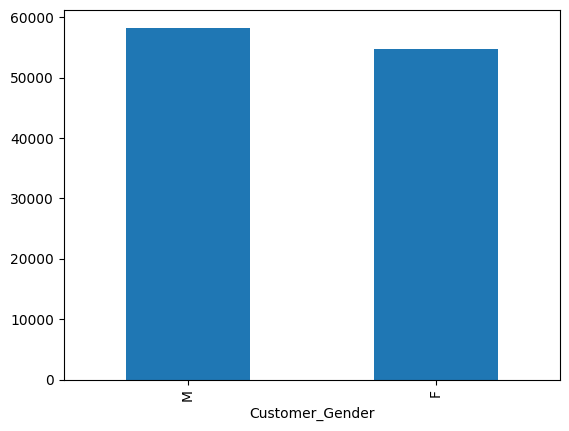

In [74]:
bike_data['Customer_Gender'].value_counts().plot.bar()

<Axes: xlabel='Age_Group'>

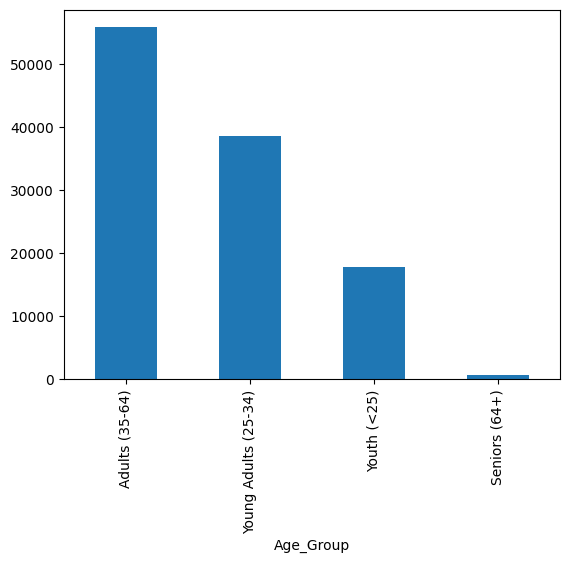

In [73]:
bike_data['Age_Group'].value_counts().plot.bar()

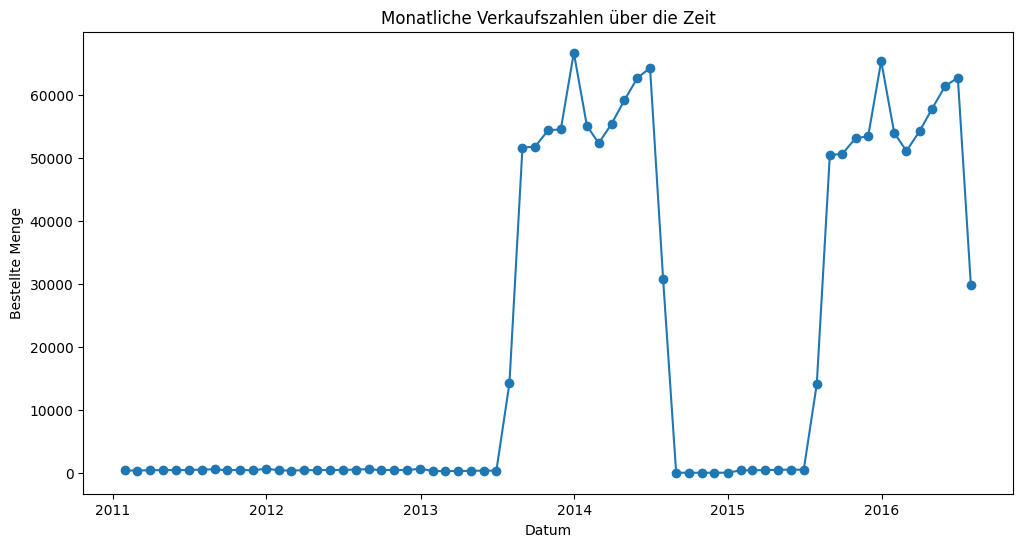

In [80]:
bike_data['Date'] = pd.to_datetime(bike_data['Date'])
monthly_sales = bike_data.groupby(pd.Grouper(key='Date', freq='M')).sum()['Order_Quantity']

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monatliche Verkaufszahlen über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Bestellte Menge')
plt.show()

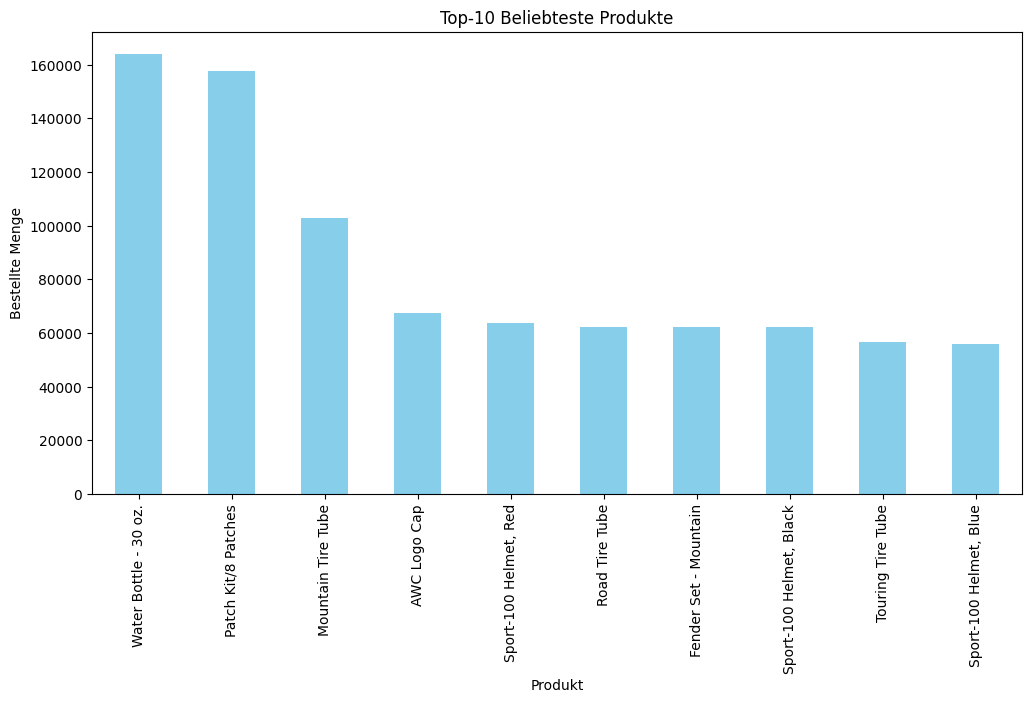

In [81]:
top_products = bike_data.groupby('Product')['Order_Quantity'].sum().sort_values(ascending=False)

top_n = 10
top_products = top_products.head(top_n)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title(f'Top-{top_n} Beliebteste Produkte')
plt.xlabel('Produkt')
plt.ylabel('Bestellte Menge')
plt.show()

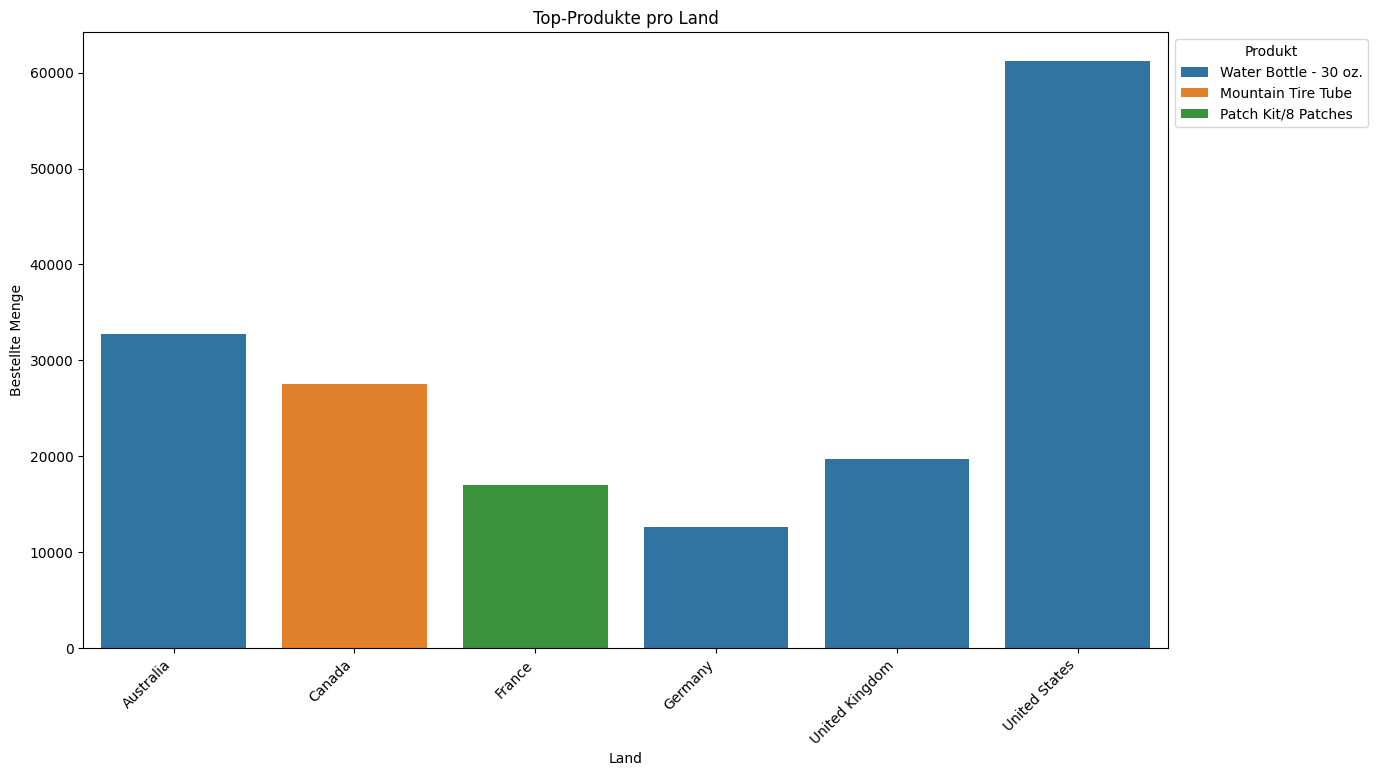

In [82]:
top_products_by_country = bike_data.groupby(['Country', 'Product'])['Order_Quantity'].sum().reset_index()

top_products_by_country = top_products_by_country.sort_values(by=['Country', 'Order_Quantity'], ascending=[True, False])
top_products_by_country = top_products_by_country.groupby('Country').head(1)

plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Order_Quantity', hue='Product', data=top_products_by_country)
plt.title('Top-Produkte pro Land')
plt.xlabel('Land')
plt.ylabel('Bestellte Menge')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Produkt', bbox_to_anchor=(1, 1))
plt.show()

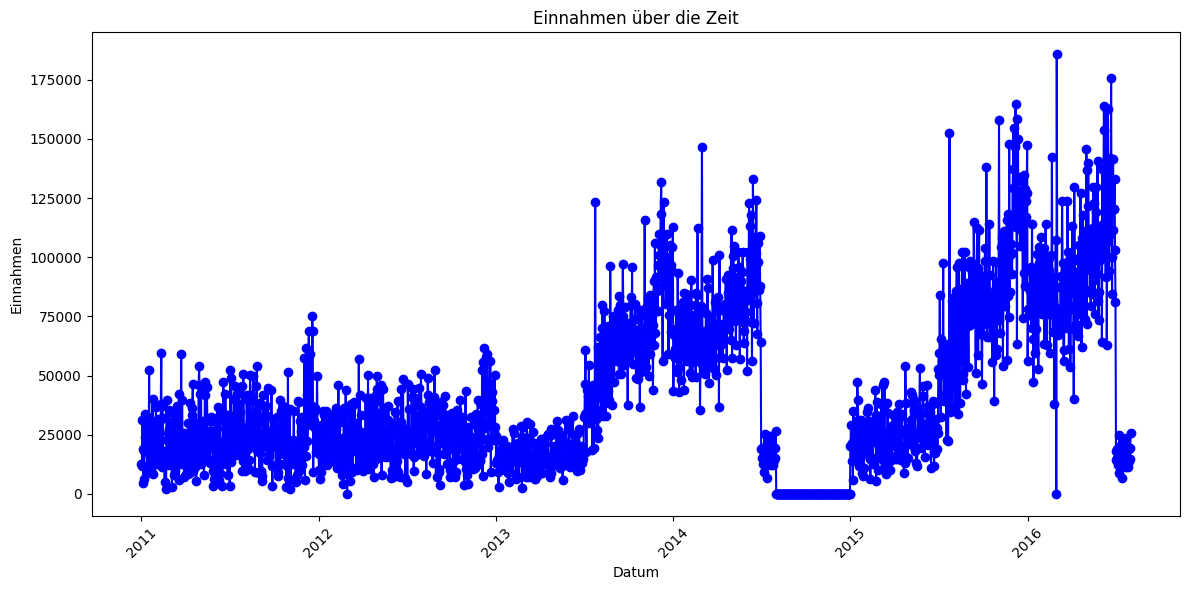

In [8]:
bike_data['Date'] = pd.to_datetime(bike_data['Date']) 
bike_data.set_index('Date', inplace=True) 

tägliche_einnahmen = bike_data.resample('D')['Revenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(tägliche_einnahmen.index, tägliche_einnahmen.values, color='blue', marker='o', linestyle='-')
plt.xlabel('Datum')
plt.ylabel('Einnahmen')
plt.title('Einnahmen über die Zeit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

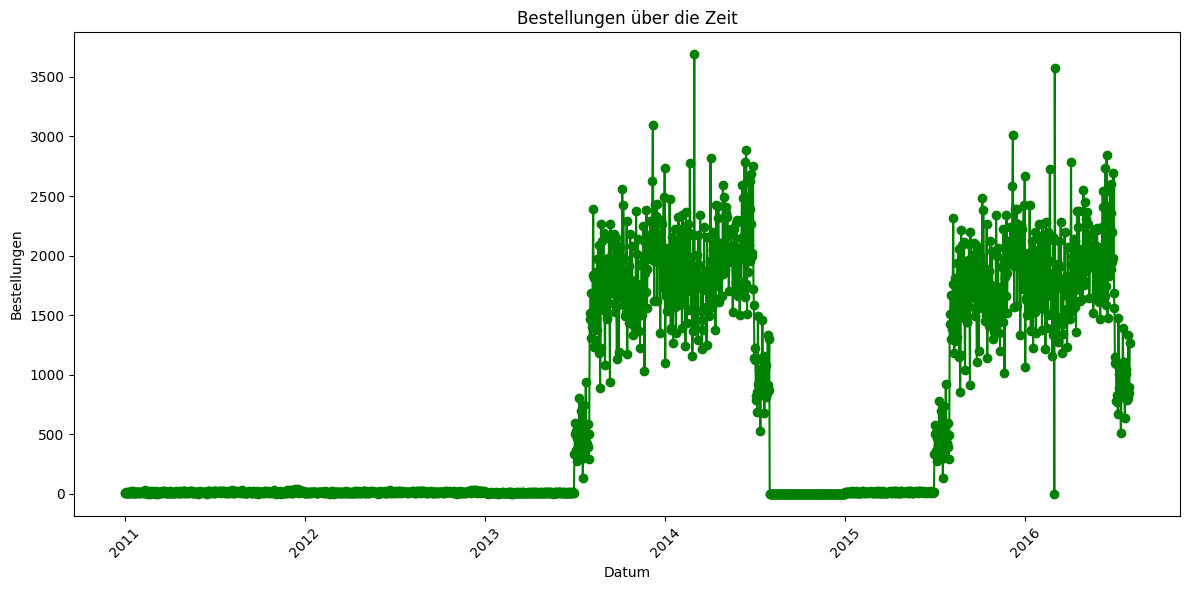

In [9]:
tägliche_bestellungen = bike_data.resample('D')['Order_Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(tägliche_bestellungen.index, tägliche_bestellungen.values, color='green', marker='o', linestyle='-')
plt.xlabel('Datum')
plt.ylabel('Bestellungen')
plt.title('Bestellungen über die Zeit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Numerical Data



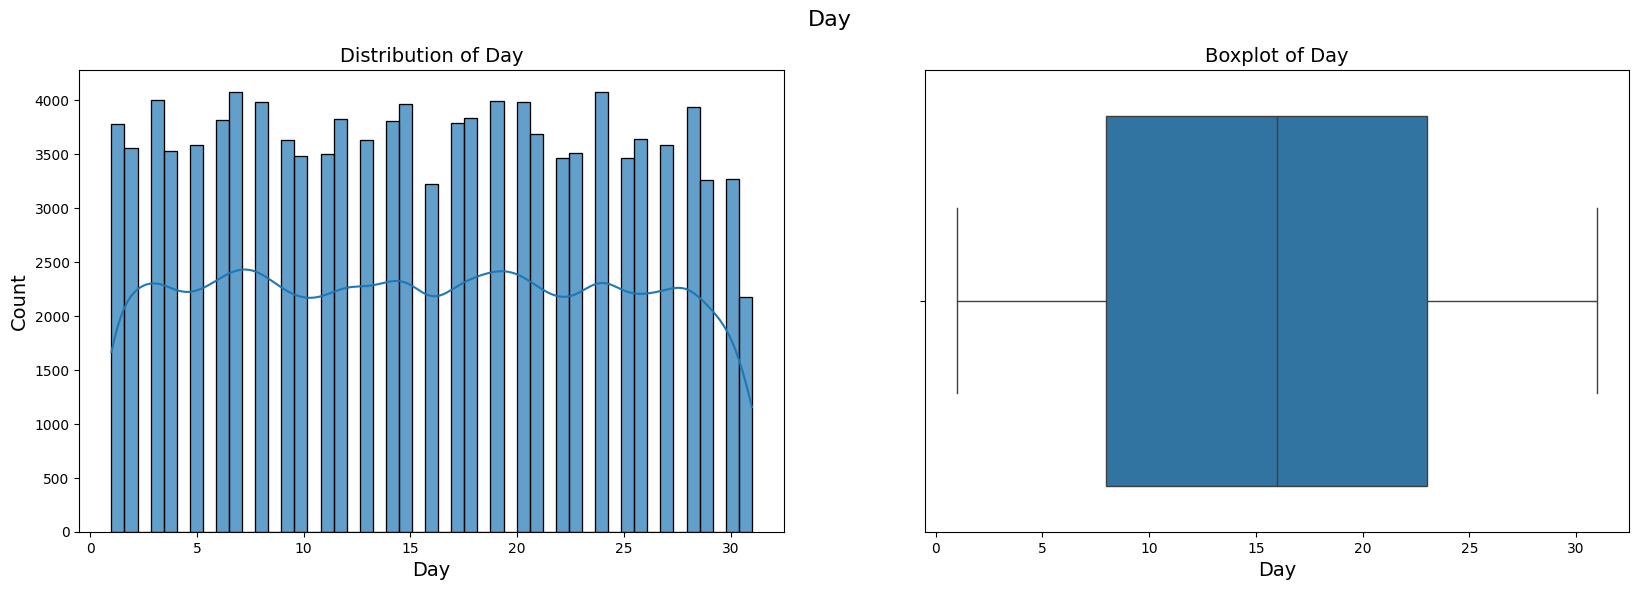

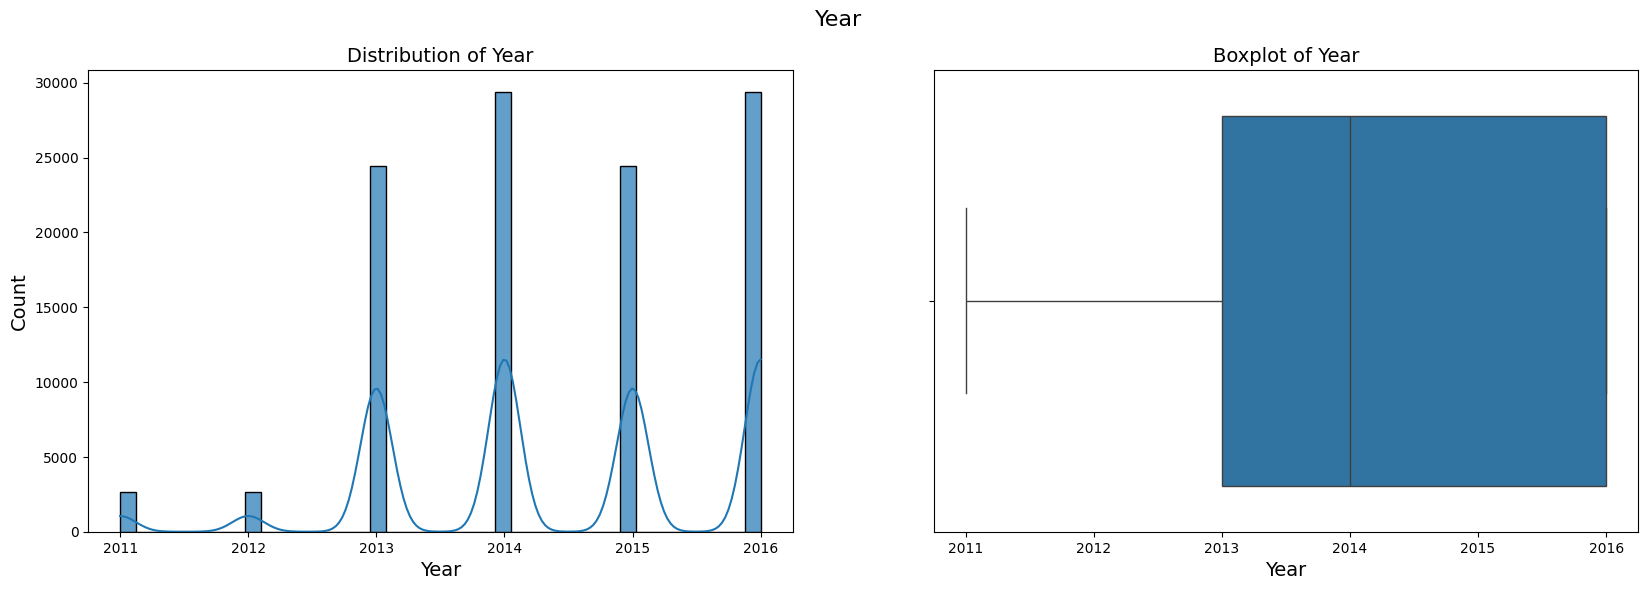

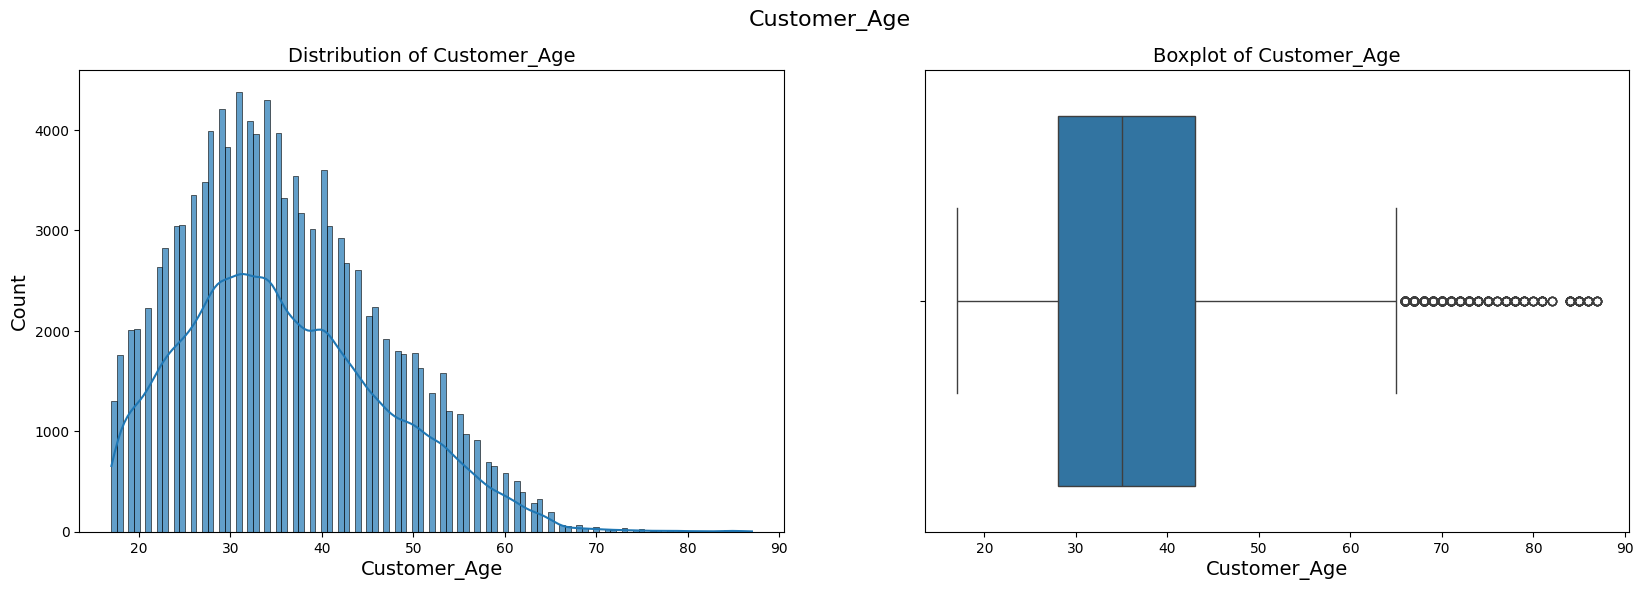

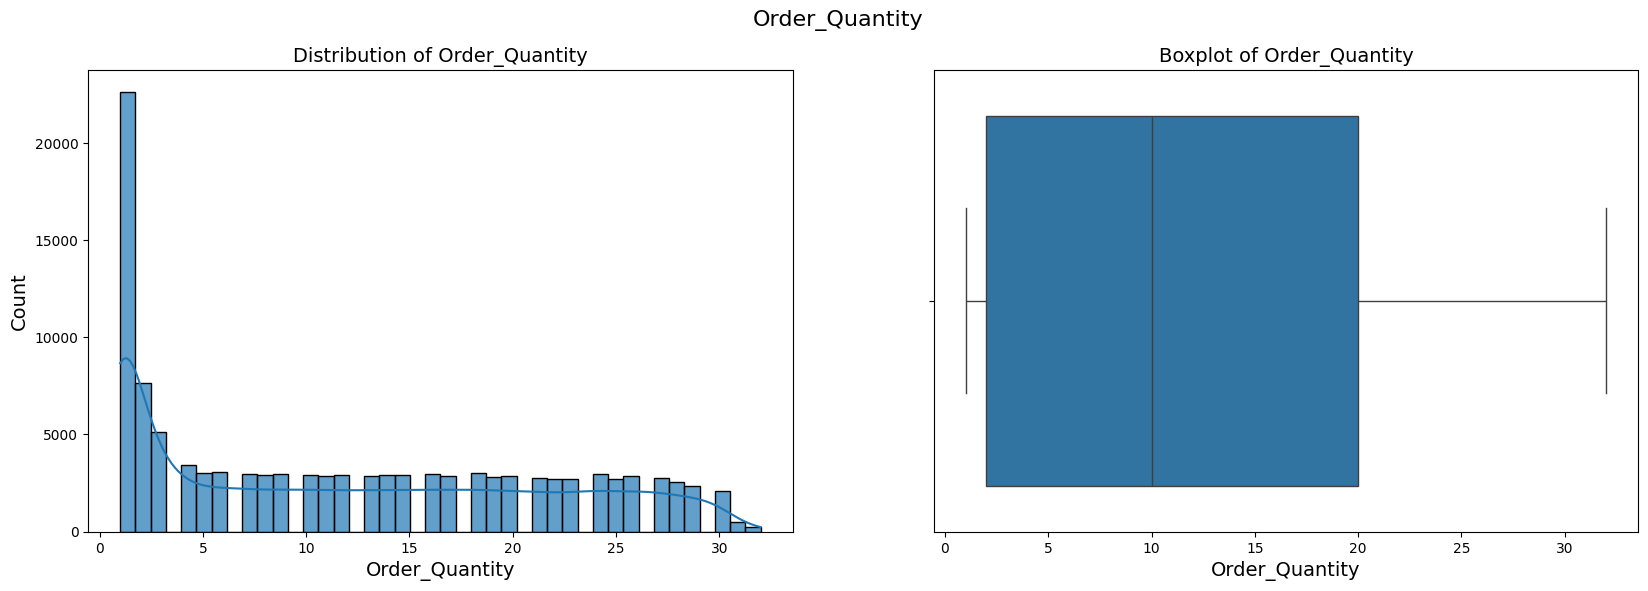

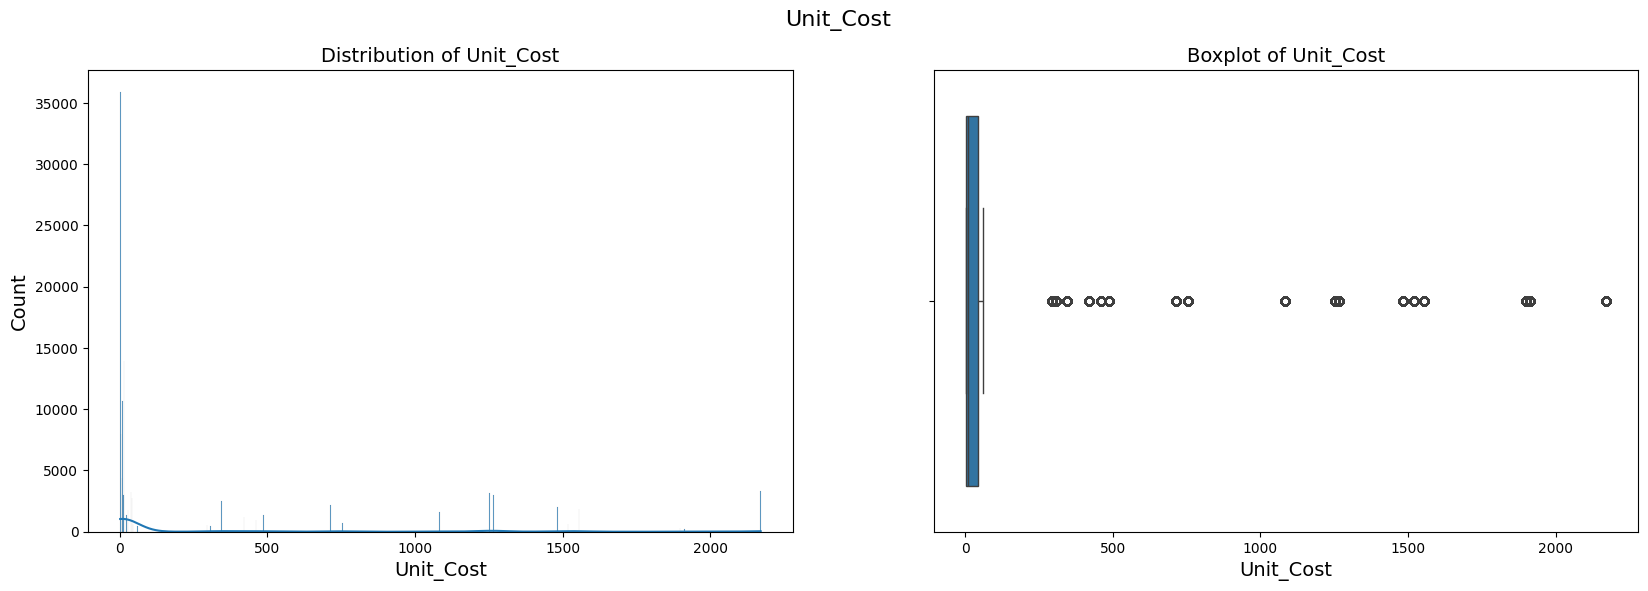

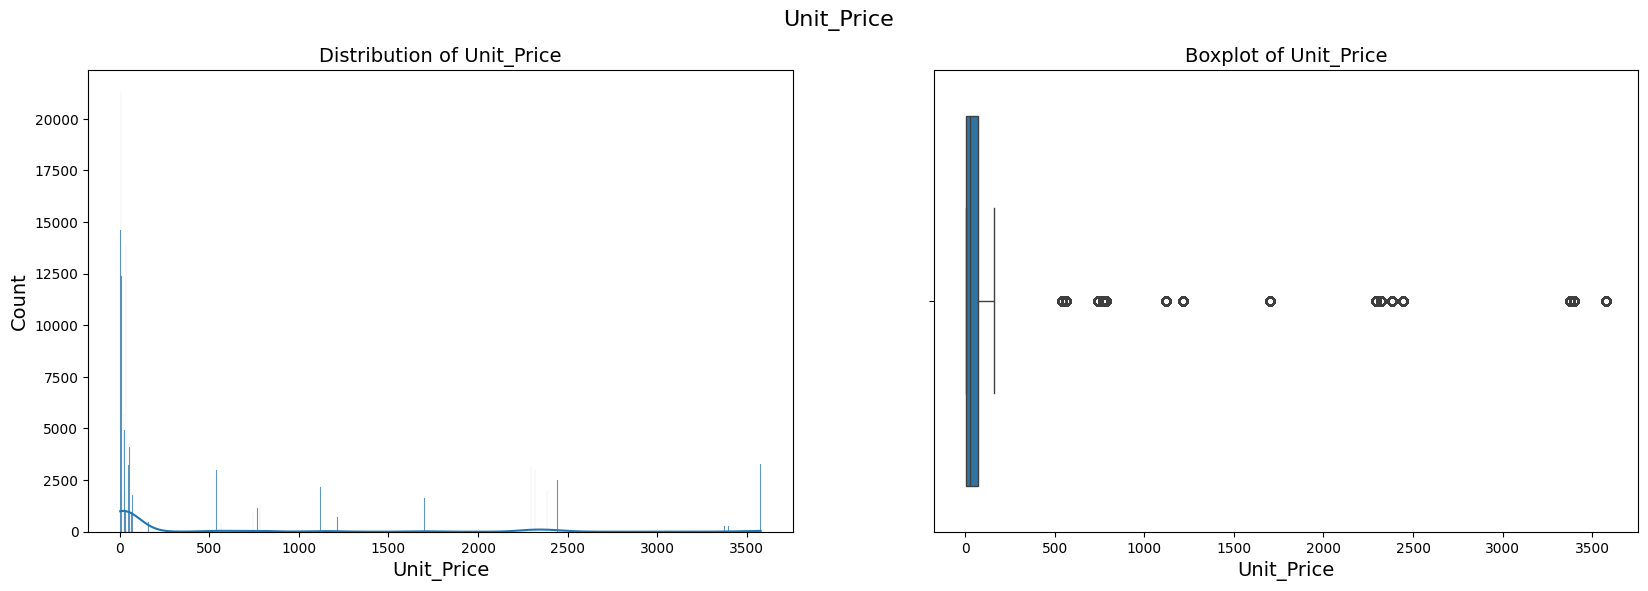

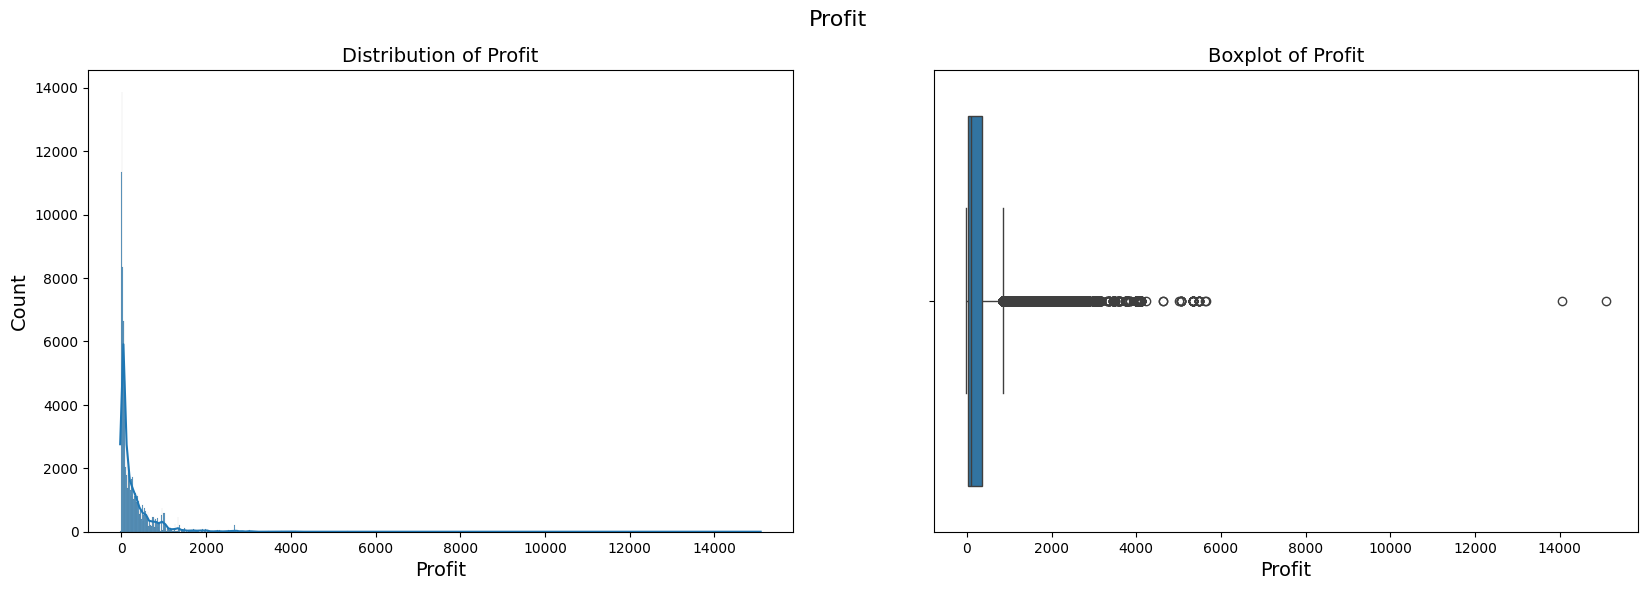

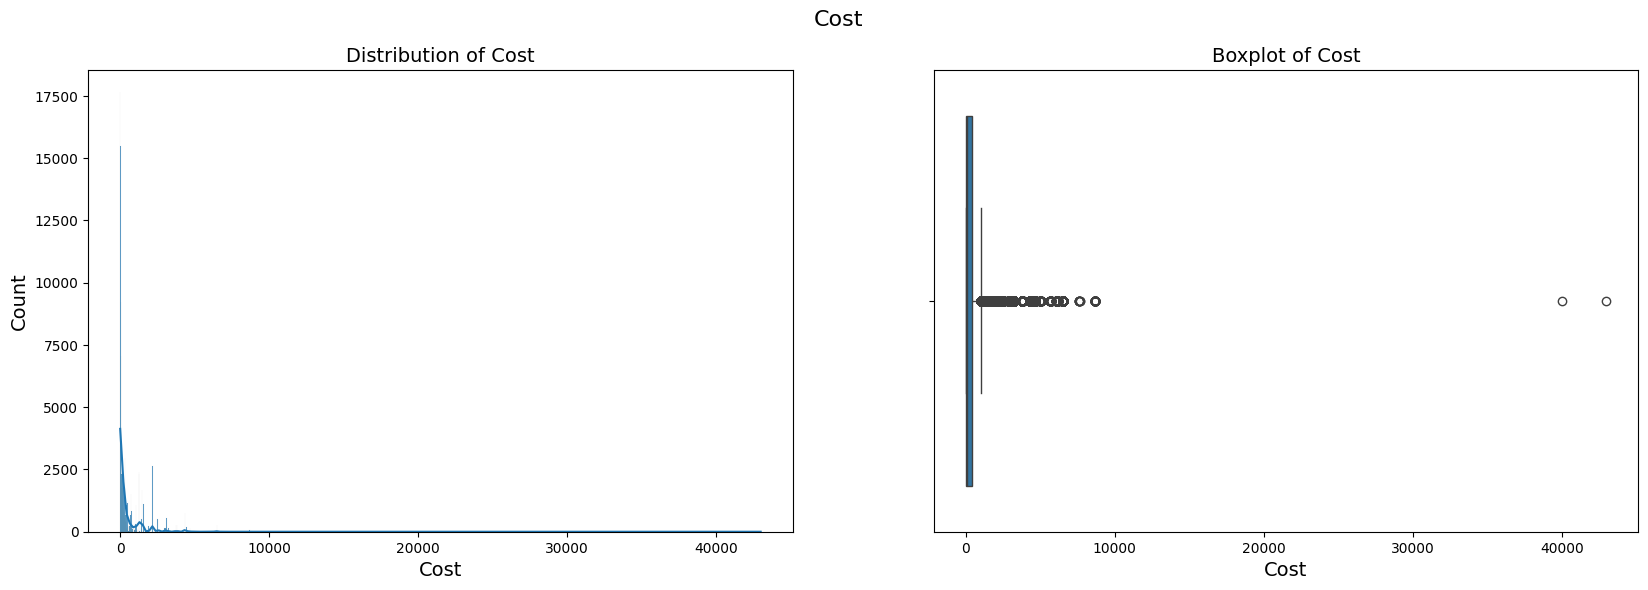

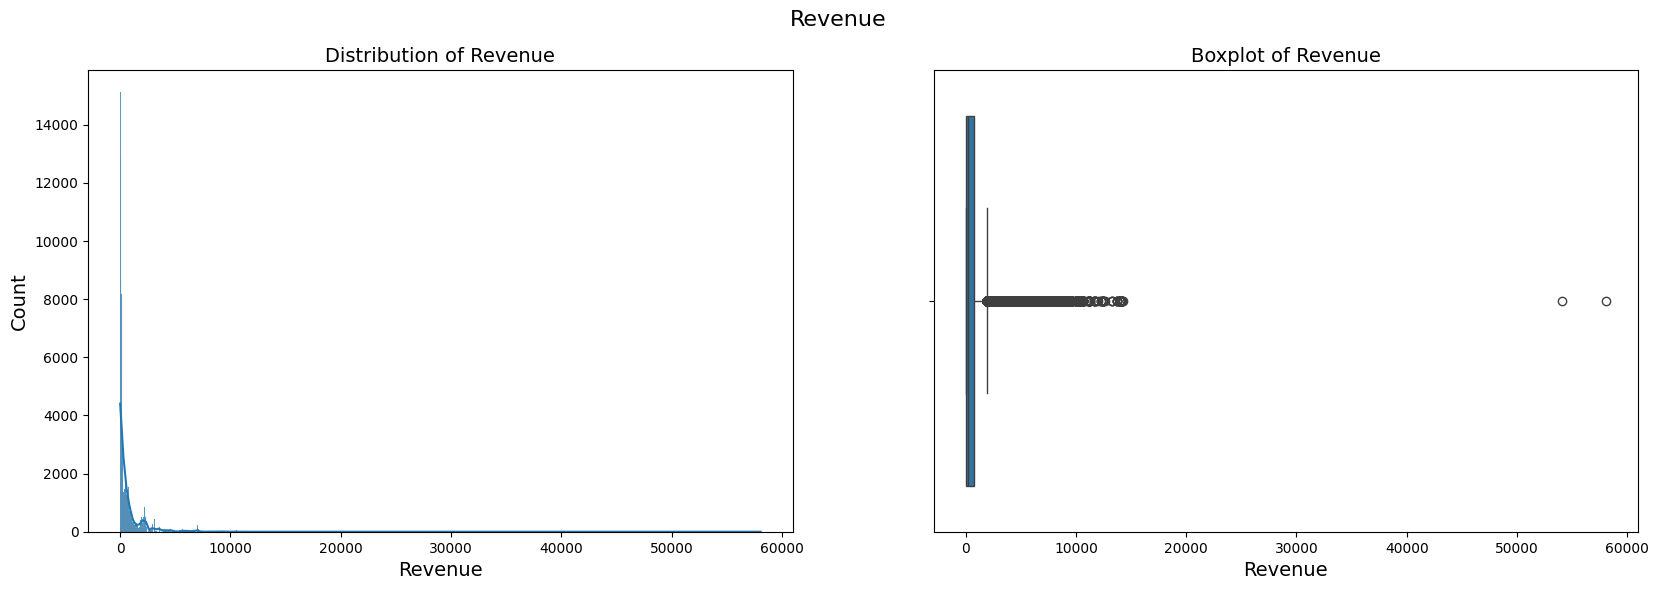

In [78]:

print("Numerical Data\n")
for i in bike_data.select_dtypes("number").columns:
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.histplot(data=bike_data[i], ax=ax[0], kde=True, alpha=0.7)
    sns.boxplot(x=bike_data[i], ax=ax[1]) 

    fig.suptitle(i, fontsize=16)
    ax[0].set_xlabel(i, fontsize=14)
    ax[0].set_ylabel('Count', fontsize=14)
    ax[0].set_title('Distribution of ' + i, fontsize=14)
    ax[1].set_xlabel(i, fontsize=14)
    ax[1].set_ylabel('')
    ax[1].set_title('Boxplot of ' + i, fontsize=14)

    plt.show()